In [224]:
import requests
import pandas as pd
import numpy as np

In [225]:
url = "https://api.tfl.gov.uk/StopPoint/Mode/tube"
resp = requests.get(url)
resp.raise_for_status()

In [226]:
data = resp.json()
stations = pd.json_normalize(data, record_path="stopPoints")

In [227]:
stations = stations[["commonName", "lat", "lon"]]

In [228]:
stations.head()

,commonName,lat,lon
0,Amersham Underground Station,51.674206,-0.607362
1,Chalfont & Latimer Underground Station,51.667915,-0.560616
2,Chalfont & Latimer Underground Station,51.668122,-0.560624
3,Chesham Underground Station,51.705227,-0.611113
4,Croxley Underground Station,51.647069,-0.441746


In [229]:
listings = pd.read_csv("data/ml_ready_listings.csv", index_col=0)

In [230]:
listings.head()

,latitude,longitude,minimum_nights,availability_365,has_review,bedroom_count,log_price,log_reviews_per_month,log_reviews_ltm,log_days_since_review,...,boro_Kensington and Chelsea,boro_Lambeth,boro_Other,boro_Southwark,boro_Tower Hamlets,boro_Wandsworth,boro_Westminster,room_Hotel room,room_Private room,room_Shared room
0,51.44306,-0.01948,3,293,1,4,5.697093,0.412110,2.564949,4.204693,...,0,0,1,0,0,0,0,0,0,0
1,51.44284,-0.01997,3,318,1,1,4.595120,0.198851,1.609438,5.459586,...,0,0,1,0,0,0,0,0,0,0
2,51.44359,-0.02275,3,302,1,2,5.003946,0.357674,1.945910,4.543295,...,0,0,1,0,0,0,0,0,0,0
3,51.44355,-0.02309,3,328,1,2,4.976734,0.262364,2.079442,4.744932,...,0,0,1,0,0,0,0,0,0,0
4,51.44333,-0.02307,3,255,1,2,5.062595,0.300105,1.609438,5.379897,...,0,0,1,0,0,0,0,0,0,0


In [231]:
stations_rad = np.radians(stations[["lat", "lon"]])
stations_rad.head()

,lat,lon
0,0.901885,-0.010600
1,0.901775,-0.009785
2,0.901779,-0.009785
3,0.902426,-0.010666
4,0.901411,-0.007710


In [232]:
from sklearn.neighbors import BallTree

tree = BallTree(stations_rad, metric="haversine")


In [233]:
listings_rad = np.radians(listings[["latitude", "longitude"]])
dists, idxs = tree.query(listings_rad, k=1)

In [234]:
listings["dist_to_tube_km"] = (dists.flatten() * 6371)
listings["nearest_station"] = stations.loc[idxs.flatten(), "commonName"].values

In [235]:
listings.head()

,latitude,longitude,minimum_nights,availability_365,has_review,bedroom_count,log_price,log_reviews_per_month,log_reviews_ltm,log_days_since_review,...,boro_Other,boro_Southwark,boro_Tower Hamlets,boro_Wandsworth,boro_Westminster,room_Hotel room,room_Private room,room_Shared room,dist_to_tube_km,nearest_station
0,51.44306,-0.01948,3,293,1,4,5.697093,0.412110,2.564949,4.204693,...,1,0,0,0,0,0,0,0,6.443845,Canada Water Underground Station
1,51.44284,-0.01997,3,318,1,1,4.595120,0.198851,1.609438,5.459586,...,1,0,0,0,0,0,0,0,6.456216,Canada Water Underground Station
2,51.44359,-0.02275,3,302,1,2,5.003946,0.357674,1.945910,4.543295,...,1,0,0,0,0,0,0,0,6.318210,Canada Water Underground Station
3,51.44355,-0.02309,3,328,1,2,4.976734,0.262364,2.079442,4.744932,...,1,0,0,0,0,0,0,0,6.315627,Canada Water Underground Station
4,51.44333,-0.02307,3,255,1,2,5.062595,0.300105,1.609438,5.379897,...,1,0,0,0,0,0,0,0,6.339453,Canada Water Underground Station


In [236]:
no_station_name_listings = listings.drop(columns="nearest_station", axis=1)
data = no_station_name_listings

In [237]:
# data = pd.get_dummies(listings,
#                       columns=["nearest_station"],
#                       prefix=["stat"],
#                       drop_first=True)

In [238]:
data.head()

,latitude,longitude,minimum_nights,availability_365,has_review,bedroom_count,log_price,log_reviews_per_month,log_reviews_ltm,log_days_since_review,...,boro_Lambeth,boro_Other,boro_Southwark,boro_Tower Hamlets,boro_Wandsworth,boro_Westminster,room_Hotel room,room_Private room,room_Shared room,dist_to_tube_km
0,51.44306,-0.01948,3,293,1,4,5.697093,0.412110,2.564949,4.204693,...,0,1,0,0,0,0,0,0,0,6.443845
1,51.44284,-0.01997,3,318,1,1,4.595120,0.198851,1.609438,5.459586,...,0,1,0,0,0,0,0,0,0,6.456216
2,51.44359,-0.02275,3,302,1,2,5.003946,0.357674,1.945910,4.543295,...,0,1,0,0,0,0,0,0,0,6.318210
3,51.44355,-0.02309,3,328,1,2,4.976734,0.262364,2.079442,4.744932,...,0,1,0,0,0,0,0,0,0,6.315627
4,51.44333,-0.02307,3,255,1,2,5.062595,0.300105,1.609438,5.379897,...,0,1,0,0,0,0,0,0,0,6.339453


In [239]:
from sklearn.model_selection import train_test_split

RAND_SEED = 42

y = data["log_price"]
X = data.drop(columns="log_price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)

In [240]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

In [241]:
gb_params = {
    "learning_rate": list(np.arange(0.01, 1.0, 0.01)),
    "max_iter": list(np.arange(100, 1100, 100)),
    "max_depth": list(np.arange(1, 21, 1)),
    "min_samples_leaf": list(np.arange(1, 51, 1))
}

rf_params = {
    "n_estimators": list(np.arange(1, 1001, 1)),
    "max_depth": [None] + list(np.arange(1, 51, 1)),
    "min_samples_leaf": list(np.arange(1, 21, 1)),
    "max_features": ["sqrt", "log2"] + list(np.arange(0.1, 1.1, 0.1))
}

gb = HistGradientBoostingRegressor(random_state=RAND_SEED)
rf = RandomForestRegressor(n_jobs=-1, random_state=RAND_SEED)

gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_params,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=RAND_SEED,
    n_jobs=-1
)

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=RAND_SEED,
    n_jobs=-1
)

gb_search.fit(X_train, y_train)
rf_search.fit(X_train, y_train)


/Users/kachaileung/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Projects/airbnb-pricing-analysis/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, np.int64(1), ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [np.int64(1), np.int64(2), ...], 'n_estimators': [np.int64(1), np.int64(2), ...]}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [242]:
voting = VotingRegressor(
    estimators=[
        ("rf", rf_search.best_estimator_),
        ("gb", gb_search.best_estimator_)
    ],
    n_jobs=-1
)

In [243]:
voting.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,weights,None
,n_jobs,-1
,verbose,False
,n_estimators,np.int64(506)
,criterion,'squared_error'
,max_depth,np.int64(20)
,min_samples_split,2
,min_samples_leaf,np.int64(2)
,min_weight_fraction_leaf,0.0
,max_features,np.float64(0.8)


In [244]:
v_pred = voting.predict(X_test)

In [245]:
from sklearn.metrics import root_mean_squared_error, r2_score

print(f"Voting || RMSE: {root_mean_squared_error(y_test, v_pred):.3f} | R²: {r2_score(y_test, v_pred):.3f}")


Voting || RMSE: 0.468 | R²: 0.665


In [246]:
stack = StackingRegressor(
    estimators=[
        ("rf", rf_search.best_estimator_),
        ("gb", gb_search.best_estimator_)
    ],
    final_estimator=Ridge(alpha=1.0),
    cv=5,
    n_jobs=-1,
    passthrough=False
)

In [247]:
stack.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,final_estimator,Ridge()
,cv,5
,n_jobs,-1
,passthrough,False
,verbose,0
,n_estimators,np.int64(506)
,criterion,'squared_error'
,max_depth,np.int64(20)
,min_samples_split,2
,min_samples_leaf,np.int64(2)


In [248]:
s_pred = stack.predict(X_test)

In [249]:
print(f"Stack || RMSE: {root_mean_squared_error(y_test, s_pred):.3f} | R²: {r2_score(y_test, s_pred):.3f}")

Stack || RMSE: 0.467 | R²: 0.666


In [250]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

estimator = stack
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=True)

cv_results = cross_validate(
    estimator,
    X, y,
    cv=10,
    scoring={"RMSE": rmse_scorer, "R²": "r2"},
    return_train_score=False,
    n_jobs=-1
)

/Users/kachaileung/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Projects/airbnb-pricing-analysis/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [251]:
mean_rmse = np.mean(cv_results["test_RMSE"])
std_rmse  = np.std(cv_results["test_RMSE"])
mean_r2   = np.mean(cv_results["test_R²"])
std_r2    = np.std(cv_results["test_R²"])

print(f"10-Fold CV RMSE: {mean_rmse:.3f} ± {std_rmse:.3f}")
print(f"10-Fold CV R²:   {mean_r2:.3f} ± {std_r2:.3f}")

10-Fold CV RMSE: 0.481 ± 0.013
10-Fold CV R²:   0.639 ± 0.014


In [252]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

results = permutation_importance(
    estimator=stack,
    X=X_test,
    y=y_test,
    scoring="r2",
    n_repeats=10,
    random_state=RAND_SEED,
    n_jobs=-1
)

/Users/kachaileung/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Projects/airbnb-pricing-analysis/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [253]:
importances = pd.Series(results.importances_mean, index=X_test.columns)
importances = importances.sort_values(ascending=False)

In [254]:
importances.head(10)

room_Private room              0.613564
longitude                      0.090045
latitude                       0.089319
bedroom_count                  0.082777
log_host_listings              0.052130
dist_to_tube_km                0.046686
availability_365               0.045720
log_reviews_per_month          0.021113
minimum_nights                 0.019505
boro_Kensington and Chelsea    0.016491
dtype: float64

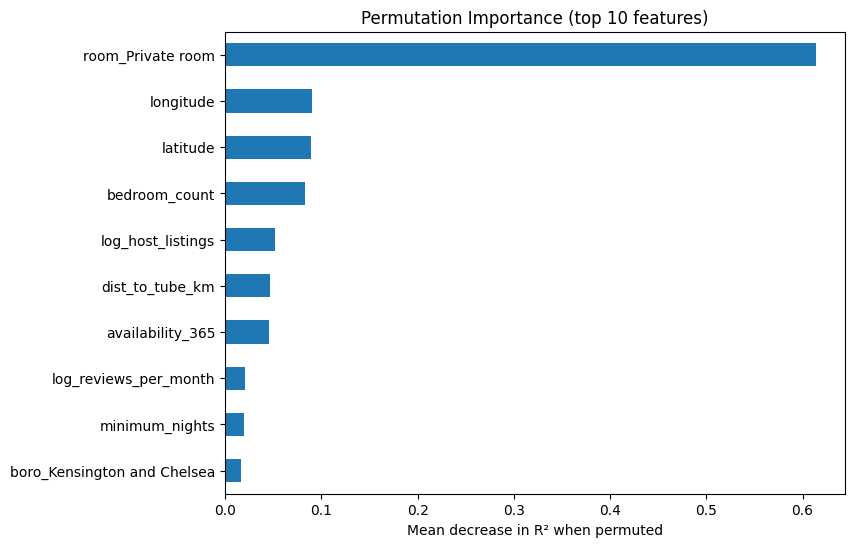

In [255]:
plt.figure(figsize=(8, 6))
importances.head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlabel("Mean decrease in R² when permuted")
plt.title("Permutation Importance (top 10 features)")
plt.show()

In [260]:
import shap

ImportError: Numba needs NumPy 2.2 or less. Got NumPy 2.3.